In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
##plt.style.use('fivethirtyeight')

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df=pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [6]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

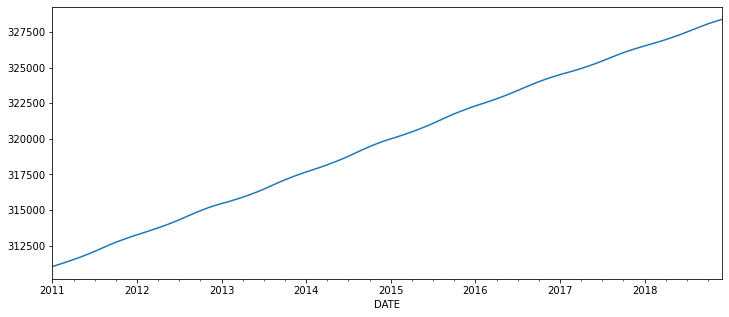

In [7]:
df['PopEst'].plot(figsize=(12,5))

In [8]:
len(df)

96

In [9]:
train=df.iloc[:84]
test=df.iloc[84:]

In [10]:
model=AR(train['PopEst'])
AR1fit=model.fit(maxlag=1)

In [11]:
start=len(train)
end=len(train)+len(test)-1

In [12]:
predictions1=AR1fit.predict(start=start,end=end).rename('AR(1) Predictions')

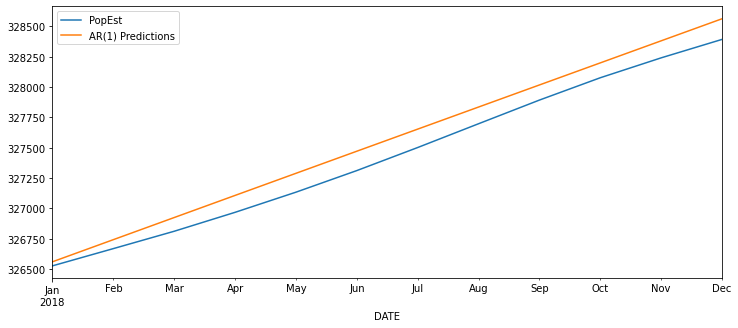

In [13]:
test.plot(figsize=(12,5))
predictions1.plot()
plt.legend()

In [14]:
model=AR(df['PopEst'])
AR2fit=model.fit(maxlag=2)

In [15]:
predictions2=AR2fit.predict(start=start,end=end).rename('AR(2) PRedictions')

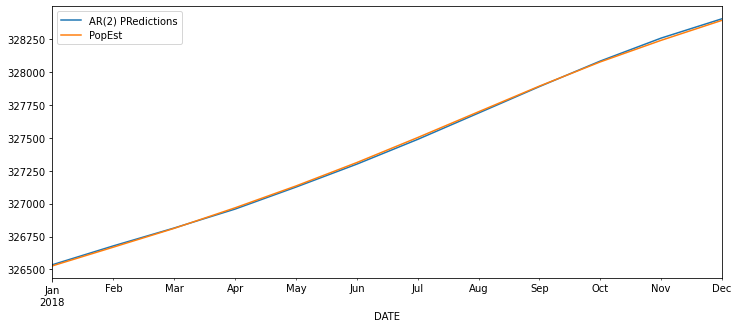

In [16]:
predictions2.plot(figsize=(12,5))
test['PopEst'].plot()
plt.legend()

In [17]:
## forecsasting

In [18]:
model=AR(df['PopEst'])
ARFit=model.fit()
predictions_forecast=ARFit.predict(start=len(df),end=len(df)+12).rename('Forecasted Values')

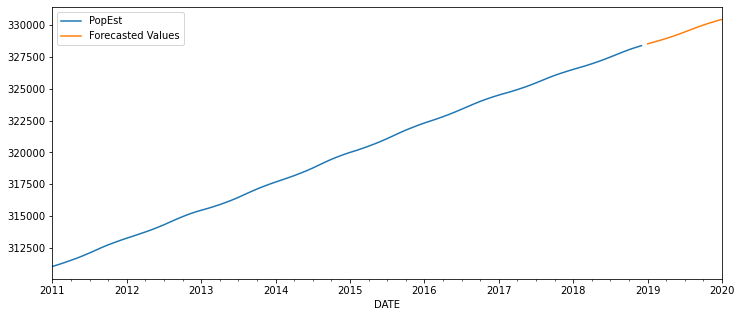

In [19]:
df.plot(figsize=(12,5))
predictions_forecast.plot()
plt.legend()